In [0]:
import urllib2
url = 'http://aima.cs.berkeley.edu/data/iris.csv'
u = urllib2.urlopen(url)
localFile = open('iris.csv', 'w')
localFile.write(u.read())
localFile.close()

In [0]:
from numpy import genfromtxt, zeros
# read the first 4 columns
data = genfromtxt('iris.csv',delimiter=',',usecols=(0,1,2,3))
# read the fifth column
target = genfromtxt('iris.csv',delimiter=',',usecols=(4),dtype=str)

In [0]:
print data.shape
print target.shape


(150, 4)
(150,)


In [0]:
print set(target) # build a collection of unique elements set([‘setosa’, ‘versicolor’, ‘virginica’])

set(['setosa', 'versicolor', 'virginica'])


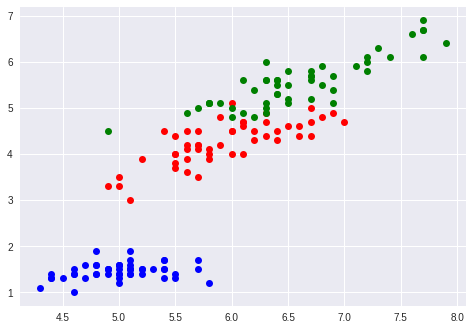

In [10]:
from pylab import plot, show
plot(data[target=='setosa',0],data[target=='setosa',2],'bo')
plot(data[target=='versicolor',0],data[target=='versicolor',2],'ro')
plot(data[target=='virginica',0],data[target=='virginica',2],'go')
show()

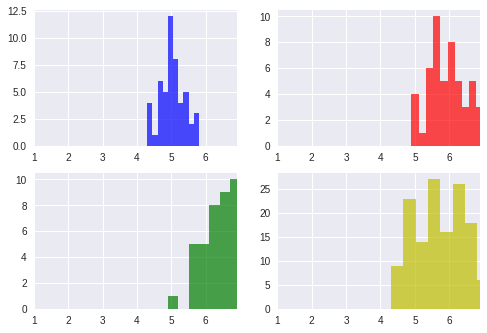

In [21]:
from pylab import figure, subplot, hist, xlim, show
xmin = min(data[:,2])
xmax = max(data[:,2])
figure()
subplot(221) # distribution of the setosa class (1st, on the top)
hist(data[target=='setosa',0],color='b',alpha=.7)
xlim(xmin,xmax)
subplot(222) # distribution of the versicolor class (2nd)
hist(data[target=='versicolor',0],color='r',alpha=.7)
xlim(xmin,xmax)
subplot(223) # distribution of the virginica class (3rd)
hist(data[target=='virginica',0],color='g',alpha=.7)
xlim(xmin,xmax)
subplot(224) # global histogram (4th, on the bottom)
hist(data[:,0],color='y',alpha=.7)
xlim(xmin,xmax)
show()

In [0]:
t = zeros(len(target))
t[target == 'setosa'] = 1
t[target == 'versicolor'] = 2
t[target == 'virginica'] = 3

In [0]:
from sklearn.naive_bayes import GaussianNB
classifer = GaussianNB()

In [32]:
print t

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]


In [0]:
from sklearn import model_selection
train, test, t_train, t_test = model_selection.train_test_split(data, t, test_size=0.1, random_state=0)

In [45]:
classifer.fit(train,t_train) # train
print classifer.score(test,t_test) # test

1.0


ImportError: ignored

In [53]:
num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
  from sklearn import model_selection
  train, test, t_train, t_test = model_selection.train_test_split(data, t, test_size=i, random_state=0)
  classifer.fit(train,t_train) # train
  print classifer.score(test,t_test) # test

0.9333333333333333
0.9666666666666667
1.0
0.9333333333333333
0.9466666666666667
0.9444444444444444
0.9333333333333333
0.9333333333333333
0.9481481481481482


In [59]:
from sklearn.model_selection import cross_val_score
# cross validation with 6 iterations
scores = cross_val_score(classifier, data, t, cv=10)
print scores
from numpy import mean
print mean(scores)

[0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
0.9533333333333334


In [37]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(classifer.predict(test),t_test)

[[16  0  0]
 [ 0 23  4]
 [ 0  0 17]]


In [38]:
from sklearn.metrics import classification_report
print classification_report(classifer.predict(test), t_test,target_names=['setosa', 'versicolor', 'virginica'])

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.85      0.92        27
   virginica       0.81      1.00      0.89        17

   micro avg       0.93      0.93      0.93        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.93      0.93        60



In [39]:
print data

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [63]:
from sklearn.cluster import KMeans
kmeans = KMeans(3,init='random') # initialization
kmeans.fit(data) # actual execution

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
c = kmeans.predict(data)

In [67]:
from sklearn.metrics import completeness_score, homogeneity_score
print completeness_score(t,c)
print homogeneity_score(t,c)

0.7649861514489816
0.7514854021988339


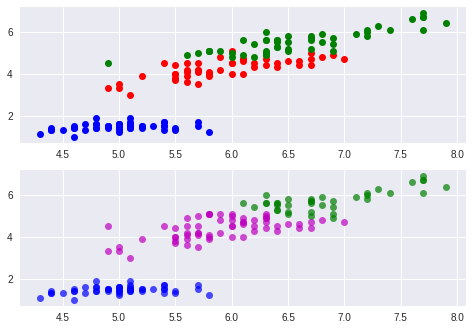

In [70]:
figure()
subplot(211) # top figure with the real classes
plot(data[t==1,0],data[t==1,2],'bo')
plot(data[t==2,0],data[t==2,2],'ro')
plot(data[t==3,0],data[t==3,2],'go')
subplot(212) # bottom fgure with classes assigned automatically
plot(data[c==1,0],data[c==1,2],'bo',alpha=.7)
plot(data[c==2,0],data[c==2,2],'go',alpha=.7)
plot(data[c==0,0],data[c==0,2],'mo',alpha=.7)
show()

In [0]:
from sklearn.metrics.cluster import v_measure_score

In [72]:
print(v_measure_score(t,c))

0.7581756800057786


In [73]:
from numpy import corrcoef
corr = corrcoef(data.T) # .T gives the transpose
print corr

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]
